40.0
36.0
[0.2        0.69136513 0.7        0.65704395 0.68554776 0.2
 0.2        0.69698955 0.7        0.48692847 0.2        0.49380365
 0.7        0.46341734 0.2        0.40762863 0.7        0.2
 0.2        0.52602791 0.44881663 0.7        0.7        0.26529479
 0.2696001  0.6915043  0.28002469 0.7        0.40794259 0.2
 0.34966686 0.7        0.7        0.2        0.2        0.7
 0.2        0.35288392 0.41177386 0.5968588  0.48021464 0.7
 0.68574162 0.2        0.4735627  0.4129617  0.37647497 0.7
 0.2        0.38086337 0.7        0.20424315 0.2        0.47002122
 0.7        0.7        0.3112797  0.55002739 0.29207443 0.7
 0.2        0.7        0.634855   0.21872017 0.7        0.52547134
 0.32098872 0.2        0.37727056 0.7        0.37032635 0.2
 0.51836152 0.7        0.65846961 0.2        0.2        0.2315031
 0.5251005  0.2        0.2        0.2        0.2        0.7
 0.2        0.2        0.2        0.37300065 0.2        0.20434589
 0.7        0.2        0.62789802 0.7        0.2 

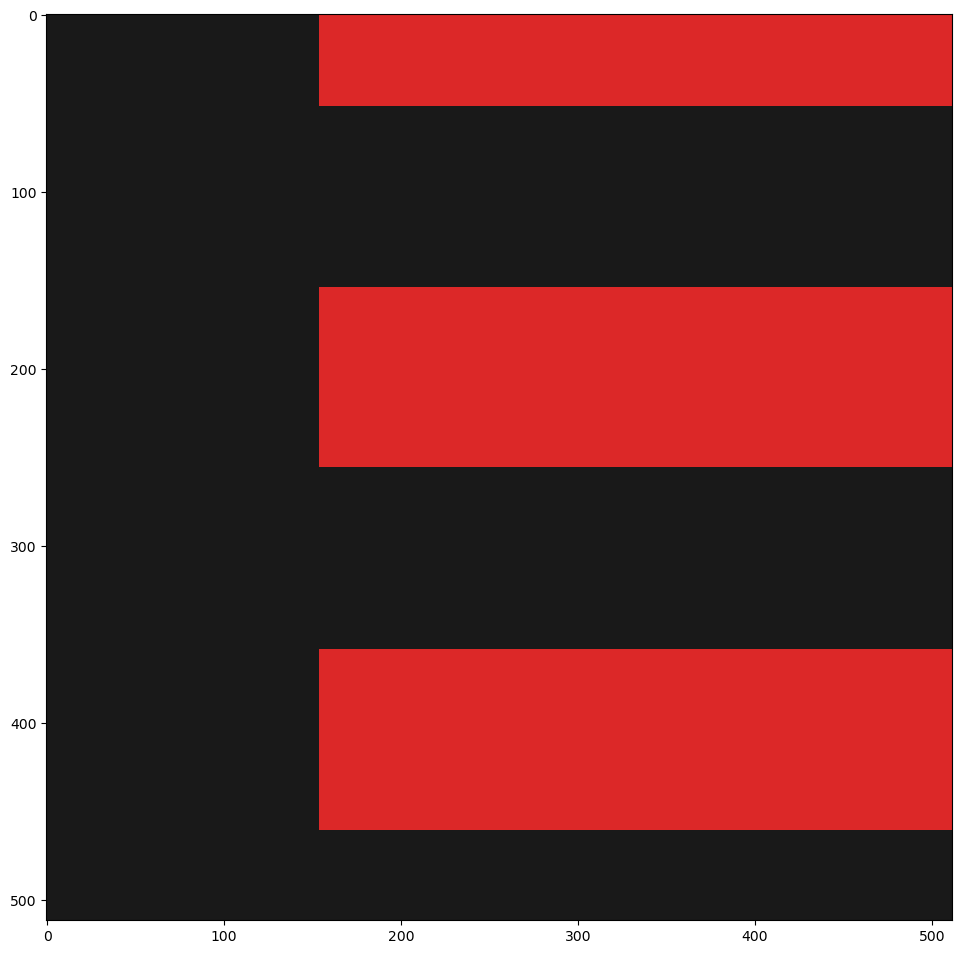

In [32]:
import numpy as np
import scipy as sp
import math

%matplotlib inline
from matplotlib import pyplot as plt

def step(a, x):
    return np.asfarray(a < x, dtype=float)

def stepf(a, x):
    return float(a < x)

a = np.random.rand(100)
b = step(0.5, a)
print(np.sum(b))

def pulse(a, b, x):
    return step(a, x) - step(b, x)

def pulsef(a, b, x):
    return stepf(a, x) - stepf(b, x)

c = pulse(0.2, 0.6, a)
print(np.sum(c))

def clamp(a, b, x):
    return np.fmin(np.fmax(a, x), b)

d = clamp(0.2, 0.7, a)
print(d)

def bias(b, x):
    return np.power(x, math.log(b) / math.log(0.5))

def gain(g, x):
    return np.where(x < 0.5, bias(1 - g, 2 * x) / 2, 1 - bias(1 - g, 2 - 2 * x) / 2)

def mix(x, y, a):
    return (1 - a) * x + a * y

def brick(cbrick, cmortar, brick_w, brick_h, mortar_thickness, uoff, voff, u, v):
    bu = math.fmod(u - uoff, brick_w + mortar_thickness)
    bv = math.fmod(v - voff, brick_h + mortar_thickness)
    mstart = mortar_thickness * 0.5
    mendw = brick_w + mstart
    mendh = brick_h + mstart
    in_brick = pulsef(mstart, mendw, bu)
    in_brick *= pulsef(mstart, mendh, bv)
    return mix(cmortar, cbrick, in_brick)

img_array = np.zeros((512, 512, 3), dtype=np.uint8)
for i in range(512):
    for j in range(512):
        u = j / 512.0
        v = (512 - i) / 512.0
        #img_array[i, j] = [v * 255, 0, 0]
        img_array[i, j] = brick(np.asarray([220, 40, 40]), np.asarray([25, 25, 25]), 0.8, 0.2, 0.2, 0.2, 0, u, v)
fig = plt.figure(figsize=(12, 12), dpi=100)
plt.imshow(img_array, interpolation='nearest')